# Analisis de Datos del Grupo H
## **Universidad De Buenos Aires y Universidad De Cine** ##

En esta notebook se abordara el análisis de los datos extraídos durante el proceso de ETL, con el objetivo de proporcionar un marco para que el **Consejo Nacional de Calidad de la Educación** pueda crear una estrategía de estimulación de carreras, utilizando como base análisis de las diferentes poblaciones de estudiantes.

**Los objetivos de este análisis son:**
  - Realizar un análisis exploratorio de las universidades de este grupo
  - Realizar una análisis descriptivo
  - Obtener datos relevantes, comunmente conocidos como insights
  - Concluir los aspectos más importantes del dataset

# Configuraciones

En esta sección configuramos todo lo necesario para el análisis, desde las librerías utilizadas hasta los colores elegidos para realizar los gráficos y las propiedades escenciales de cada uno, para así mantener una consistencia.

In [61]:
#Realizamos los imports necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

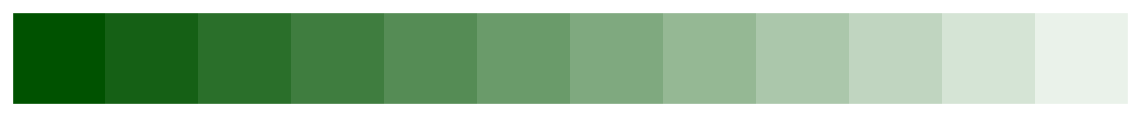

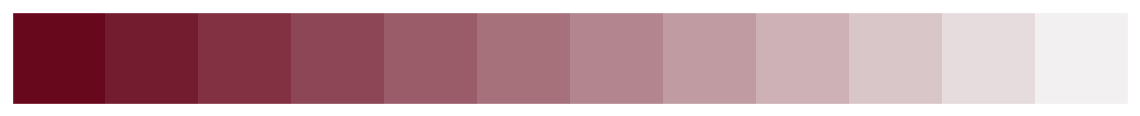

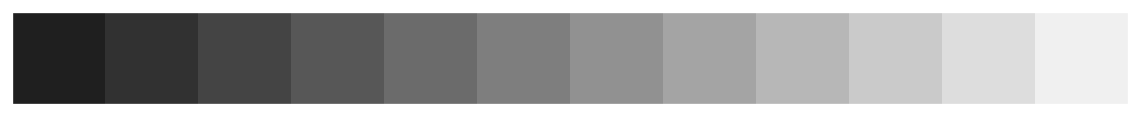

In [62]:
plt.rcParams['figure.dpi'] = 120
plt.rcParams['legend.frameon'] = False

sns.set_style('dark')
colors_green = sns.light_palette("#005200", input='rgb',n_colors=12)[::-1]
colors_red = sns.light_palette("#68081C", input='rgb',n_colors=12)[::-1]
colors_dark = sns.light_palette("#1F1F1F", input='rgb',n_colors=12)[::-1]

sns.palplot(colors_green)
sns.palplot(colors_red)
sns.palplot(colors_dark)

# Importaciones de los datos

En esta sección **importamos los datasets transformados** y además datos externos de la base de datos geonames para extraer las provincias de los alumnos, con el fin de realizar un análisis más profundo respecto a la **variable geográfica**.

In [63]:
#Colocamos el nombre de las universidades en dos variables
#Para una futura reutilización del codigo

university1 = 'GrupoH_UBA'
university1_name = 'Universidad De Buenos Aires'

university2 = 'GrupoH_Cine'
university2_name = 'Universidad Del Cine'

df_1 = pd.read_csv(f'../../datasets/{university1}_process.txt', sep=',')
df_2 = pd.read_csv(f'../../datasets/{university2}_process.txt', sep=',')
df_geonames = pd.read_csv('../AR_geonames.txt', sep='\t', header=None)


In [64]:
# Fix preventivo de columna extra
df_1.drop('Unnamed: 0', axis=1, inplace=True, errors='ignore')

df_2.drop('Unnamed: 0', axis=1, inplace=True, errors='ignore')

# Primer acercamiento, correcciones y transformaciones adicionales

En esta sección vemos los aspectos fundamentales de los datos a trabajar, hacemos algunas correcciones y expandimos los datos

In [65]:
#imprimimos las columnas
df_1.columns 

Index(['university', 'career', 'inscription_date', 'first_name', 'last_name',
       'gender', 'age', 'postal_code', 'location', 'email'],
      dtype='object')

In [66]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844 entries, 0 to 1843
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   university        1844 non-null   object
 1   career            1844 non-null   object
 2   inscription_date  1844 non-null   object
 3   first_name        1844 non-null   object
 4   last_name         1844 non-null   object
 5   gender            1844 non-null   object
 6   age               1844 non-null   int64 
 7   postal_code       1844 non-null   int64 
 8   location          1844 non-null   object
 9   email             1844 non-null   object
dtypes: int64(2), object(8)
memory usage: 144.2+ KB


In [67]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   university        1806 non-null   object
 1   career            1806 non-null   object
 2   inscription_date  1806 non-null   object
 3   first_name        1806 non-null   object
 4   last_name         1806 non-null   object
 5   gender            1806 non-null   object
 6   age               1806 non-null   int64 
 7   postal_code       1806 non-null   int64 
 8   location          1806 non-null   object
 9   email             1806 non-null   object
dtypes: int64(2), object(8)
memory usage: 141.2+ KB


In [68]:
print(f'La cantida de carreras en la {university1_name} es de:',len(df_1.career.unique()))
print(f'La cantida de carreras en la {university2_name} es de:',len(df_1.career.unique()))

La cantida de carreras en la Universidad De Buenos Aires es de: 33
La cantida de carreras en la Universidad Del Cine es de: 33


In [69]:
df_1.describe()

,age,postal_code
count,1844.000000,1844.000000
mean,44.335141,4879.919197
std,30.541814,2235.950332
min,0.000000,1601.000000
25%,15.000000,3039.500000
50%,42.000000,4653.000000
75%,72.000000,6553.000000
max,99.000000,9421.000000


In [70]:
df_2.describe()

,age,postal_code
count,1806.000000,1806.000000
mean,58.237542,4731.353267
std,32.965365,2184.496296
min,1.000000,1601.000000
25%,30.000000,2913.000000
50%,58.000000,4191.000000
75%,87.000000,6409.000000
max,116.000000,9421.000000


Las únicas variables númericas dentro del dataset es la edad y el código postal, aunque este último más bien debería considerarse como categórica. Por lo tanto gráficamos como se vería la distribución de los valores de edad.

Text(0, 0.5, 'Cantidad')

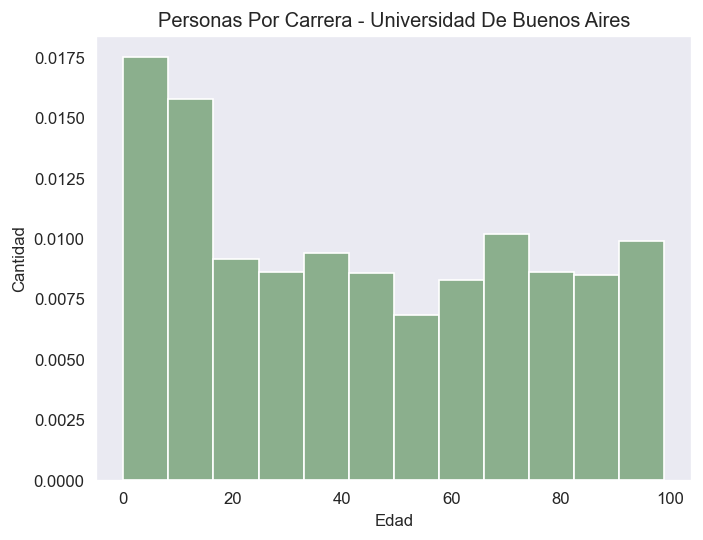

In [71]:
sns.histplot(df_1.age, color=colors_green[5],stat='density')
plt.title(f'Personas por carrera - {university1_name}'.title())
plt.xlabel('Edad')
plt.ylabel('Cantidad')

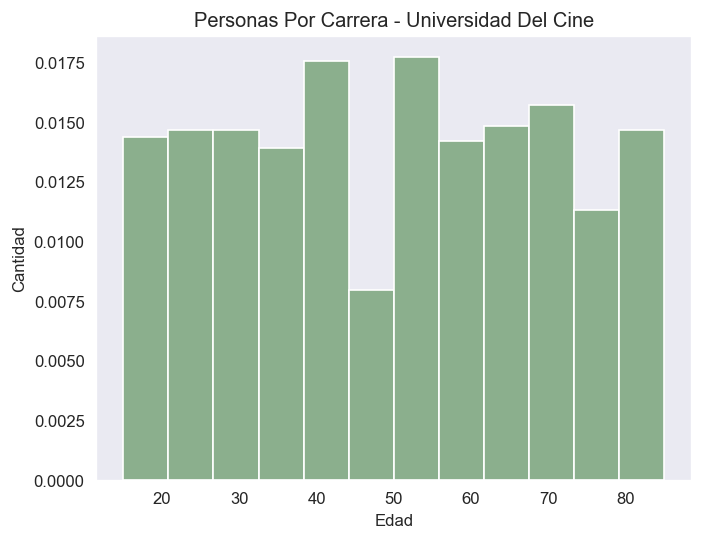

In [114]:
sns.histplot(df_2.age, color=colors_green[5],stat='density')
plt.title(f'Personas por carrera - {university2_name}'.title())
plt.xlabel('Edad')
plt.ylabel('Cantidad')

plt.show()

Como vemos que las edades tienen valores que no son coherentes, como serían alumnos menores de 15 años y mayores de 85, siendo que la edad de ingreso a la universidad usualmente es de 17-18 años y siendo que la esperanza de vida de argentina es hasta los 72 años aproximadamente (1).

(1) https://datosmacro.expansion.com/demografia/esperanza-vida/argentina#:~:text=En%202020%20la%20esperanza%20de,fue%20de%2073%2C41%20a%C3%B1os.

In [73]:
df_1 = df_1[df_1.age.between(15,85)]
df_2 = df_2[df_2.age.between(15,85)]

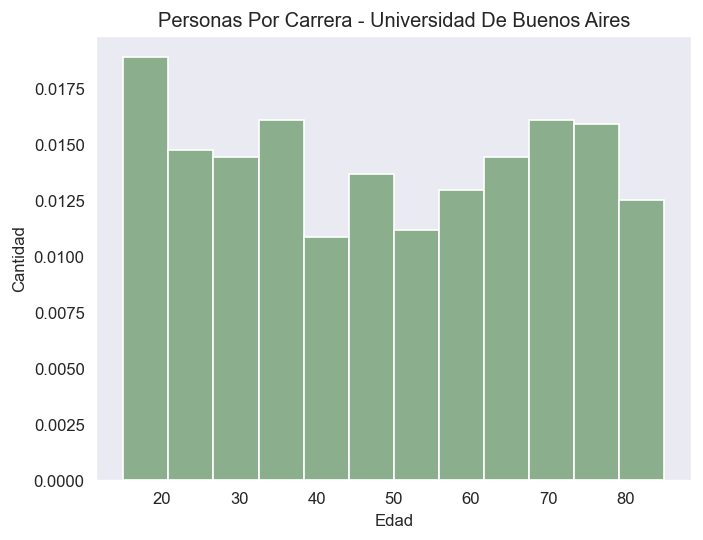

In [115]:
sns.histplot(df_1.age, color=colors_green[5],stat='density')
plt.title(f'Personas por carrera - {university1_name}'.title())
plt.xlabel('Edad')
plt.ylabel('Cantidad')

plt.show()

La distribución de las dedades para esta universidad parece tratarse de una distribución cuasi uniforme, con una pequeña mayoria en las edades más jovenes de entre 17 y 25 años.

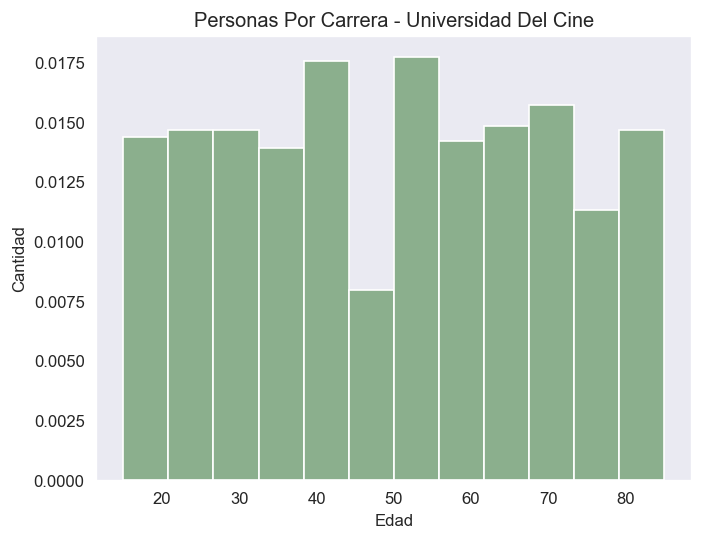

In [116]:
sns.histplot(df_2.age, color=colors_green[5],stat='density')
plt.title(f'Personas por carrera - {university2_name}'.title())
plt.xlabel('Edad')
plt.ylabel('Cantidad')

plt.show()

Como podemos ver hay una distribución bastante uniforme, con una notable baja de estudiantes en el rango de 45 años. Este dato llama la atencion en especial porque el top en cuanto a la cantidad de alumnos esta dado justamente por las edades tanto previas como posteriores (40 y 50 años).

Las variables de este dataset extraido corresponde a las siguientes columnas:

- **'university'**: esta variable menciona la universidad en la que asiste el alumno
- **'career'**: carrera de la que es alumno
- **'inscription_date'**: fecha en la que se inscribio, 
- **'first_name'**: nombres
- **'last_name'**: apellido/s
- **'gender'**: género declarado
- **'age'**: edad en años
- **'postal_code'**: código postal
- **'location'**: localidad
- **'email'**: mail de contacto

In [76]:
df_geonames.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11
0,AR,3636,"POZO CERCADO (EL CHORRO (F), DPTO. RIVADAVIA (S))",Salta,A,NaN,NaN,NaN,NaN,-23.4933,-61.9267,3
1,AR,4123,LAS SALADAS,Salta,A,NaN,NaN,NaN,NaN,-25.7833,-64.5000,4


Este dataset externo trae datos para enriquecer el dataset original y aporta variables imporantes como la **region**, que en este caso hace referencia a la provincia.

In [77]:
df_geonames.dropna(axis=1, inplace=True)

Realizamos la combinacion de los datasets

In [78]:
df_geonames.columns = ['country','postal_code', 'location', 'region', 'type', 'lat', 'lon', 'type_2']

In [79]:
df_1geonames_merge = df_geonames.merge(df_1, on='postal_code', how='right')

In [80]:
df_1geonames_merge.head(2)

,country,postal_code,location_x,region,type,lat,lon,type_2,university,career,inscription_date,first_name,last_name,gender,age,location_y,email
0,AR,3151,COLONIA ANGELA,Entre Rios,E,-32.3889,-59.9333,3.0,universidad de buenos aires,licenciatura en gestión de agroalimentos,2020-09-27,angela,hudson,female,17,antelo,cpatterson@yahoo.com
1,AR,3151,CRUCECITAS 3ª SECCION,Entre Rios,E,-32.3889,-59.9333,3.0,universidad de buenos aires,licenciatura en gestión de agroalimentos,2020-09-27,angela,hudson,female,17,antelo,cpatterson@yahoo.com


In [81]:
df_2geonames_merge = df_geonames.merge(df_2, on='postal_code', how='right')
df_2geonames_merge.head(2)

,country,postal_code,location_x,region,type,lat,lon,type_2,university,career,inscription_date,first_name,last_name,gender,age,location_y,email
0,AR,9037,ALTO RIO MAYO,Chubut,U,-45.55,-71.3,4.0,universidad del cine,ciencias veterinarias,2020-12-31,stacey,medina,female,63,aldea beleiro,sarahpham@yahoo.com
1,AR,9037,ALDEA BELEIRO,Chubut,U,-45.55,-71.3,3.0,universidad del cine,ciencias veterinarias,2020-12-31,stacey,medina,female,63,aldea beleiro,sarahpham@yahoo.com


Podemos observar nuestro dataset expandido con los nuevos datos geográficos.

# Análisis exploratorío

Un primer paso para describir nuestro dataset es ver las carreras cursadas dentro de las universidades estudiadas

### Curriculas

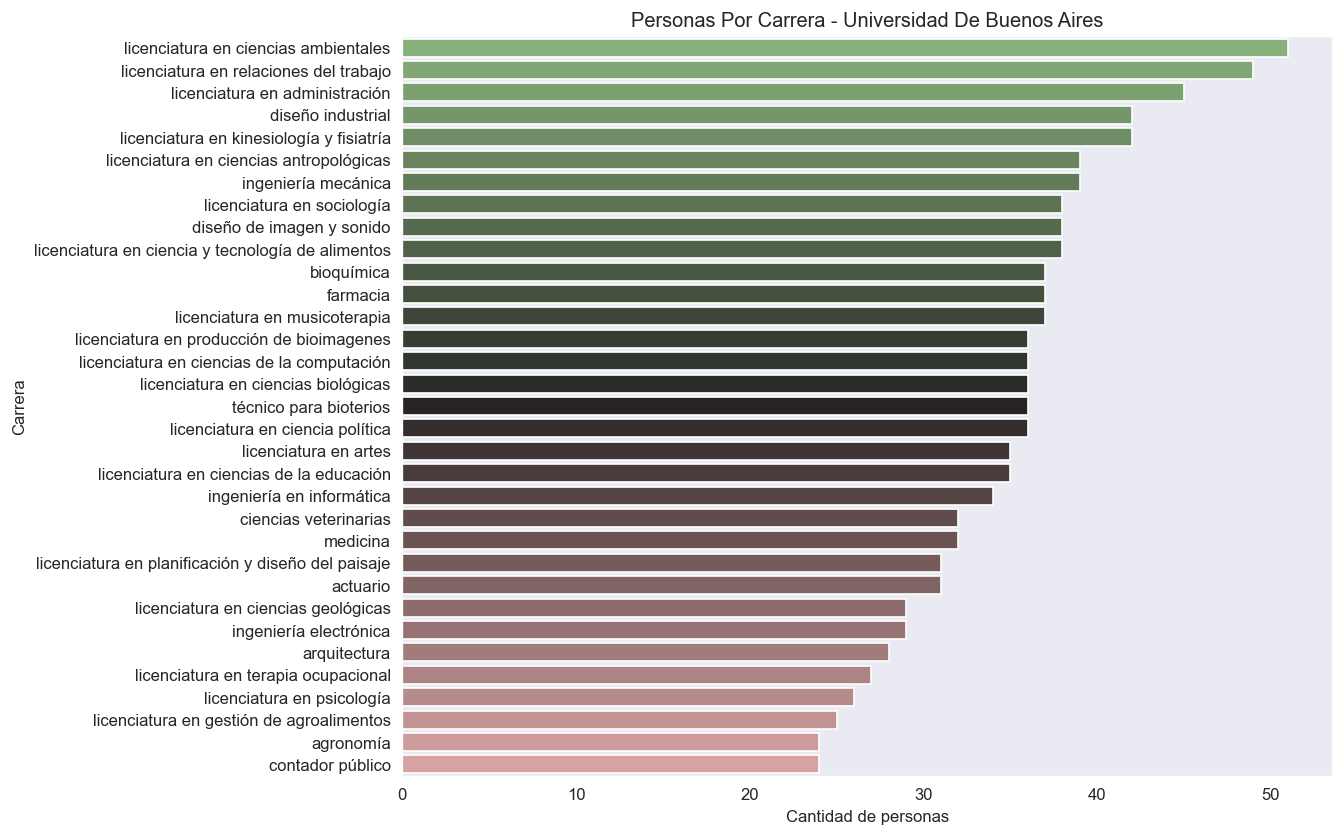

In [82]:
df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)
palette = sns.diverging_palette(120,12,s=55,l=70,n=33,center='dark')
plt.figure(figsize=(10, 8))
sns.barplot(data=df_aux, x='university', y='career', palette=palette)

plt.title(f'Personas por carrera - {university1_name}'.title())
plt.xlabel('Cantidad de personas')
plt.ylabel('Carrera')

plt.show()

En principio podémos observar que hay una diferencia entre la cantidad de personas que componen el alumnado, al observar el total de alumnos de cada carrera.

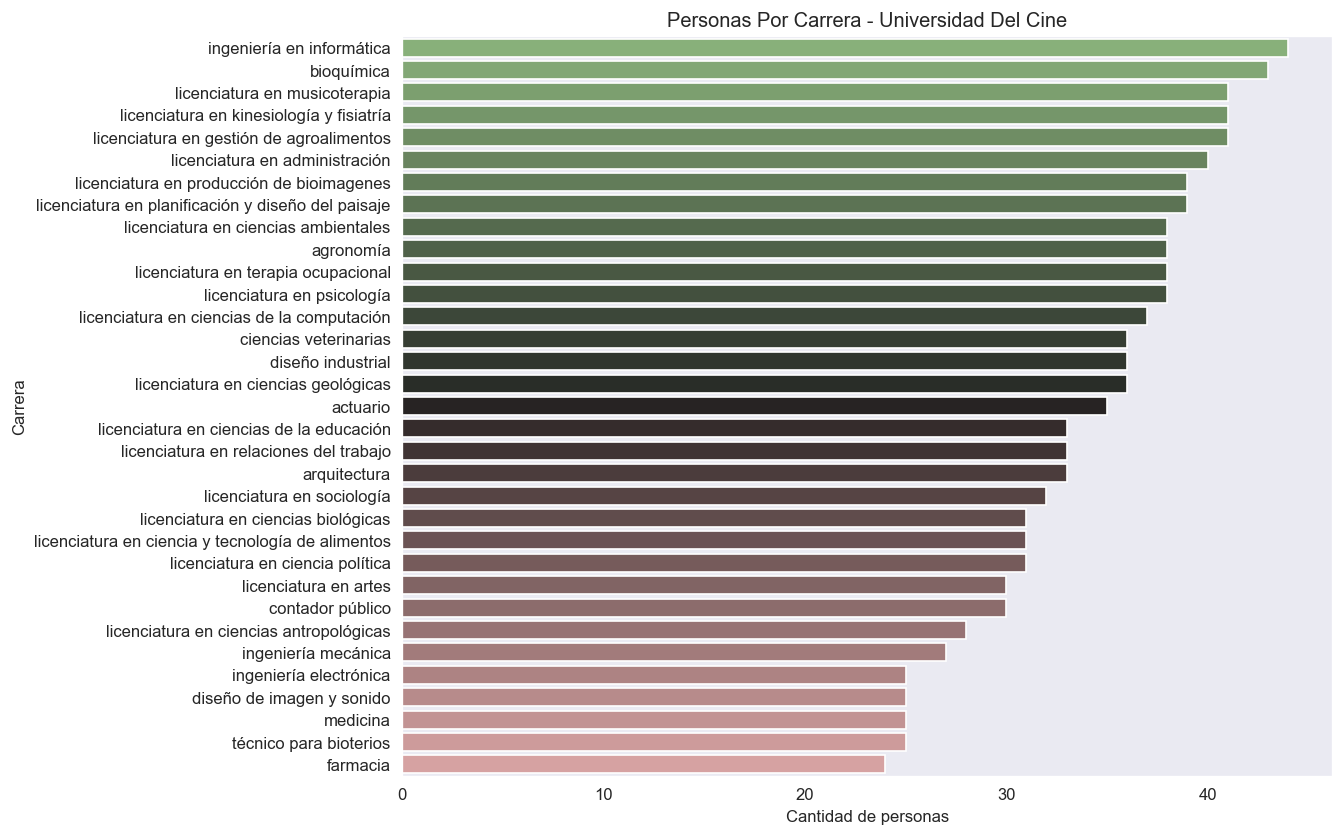

In [83]:
df_aux = df_2.groupby('career').count().reset_index().sort_values('university', ascending=False)
palette = sns.diverging_palette(120,12,s=55,l=70,n=33,center='dark')
plt.figure(figsize=(10, 8))
sns.barplot(data=df_aux, x='university', y='career', palette=palette)

plt.title(f'Personas por carrera - {university2_name}'.title())
plt.xlabel('Cantidad de personas')
plt.ylabel('Carrera')

plt.show()

Esto es algo que se repite en esta universidad, pero la cantidad de alumnos por carrera es más grande y la diferencia parece ser más atenuada entre la carrera más concurrida con la menor concurrida.

## Detalle de la variable carrera

Para evaluar más en detalle la composición de alumnos para las diferentes carreras se propone observar las diez carreras con más alumnos de cada universidad y las 10 carreras con menos alumnos de cada universidad, para además comparar con la media de alumnos de toda la oferta académica.



### Universidad De Buenos Aires

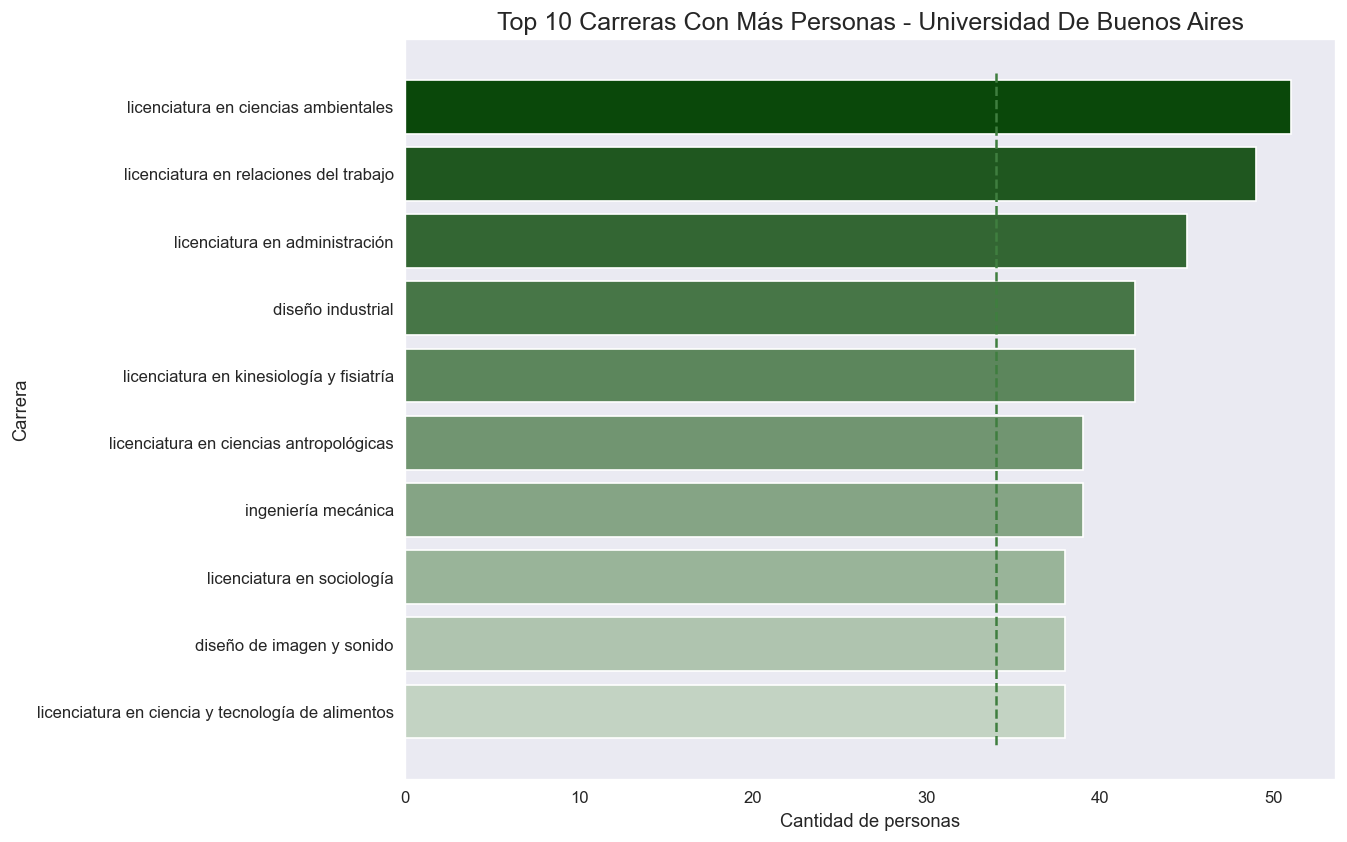

In [84]:
df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_1.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.head(10), x='university', y='career', palette=colors_green, ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_green[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con más personas - {university1_name}'.title(),{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

plt.show()

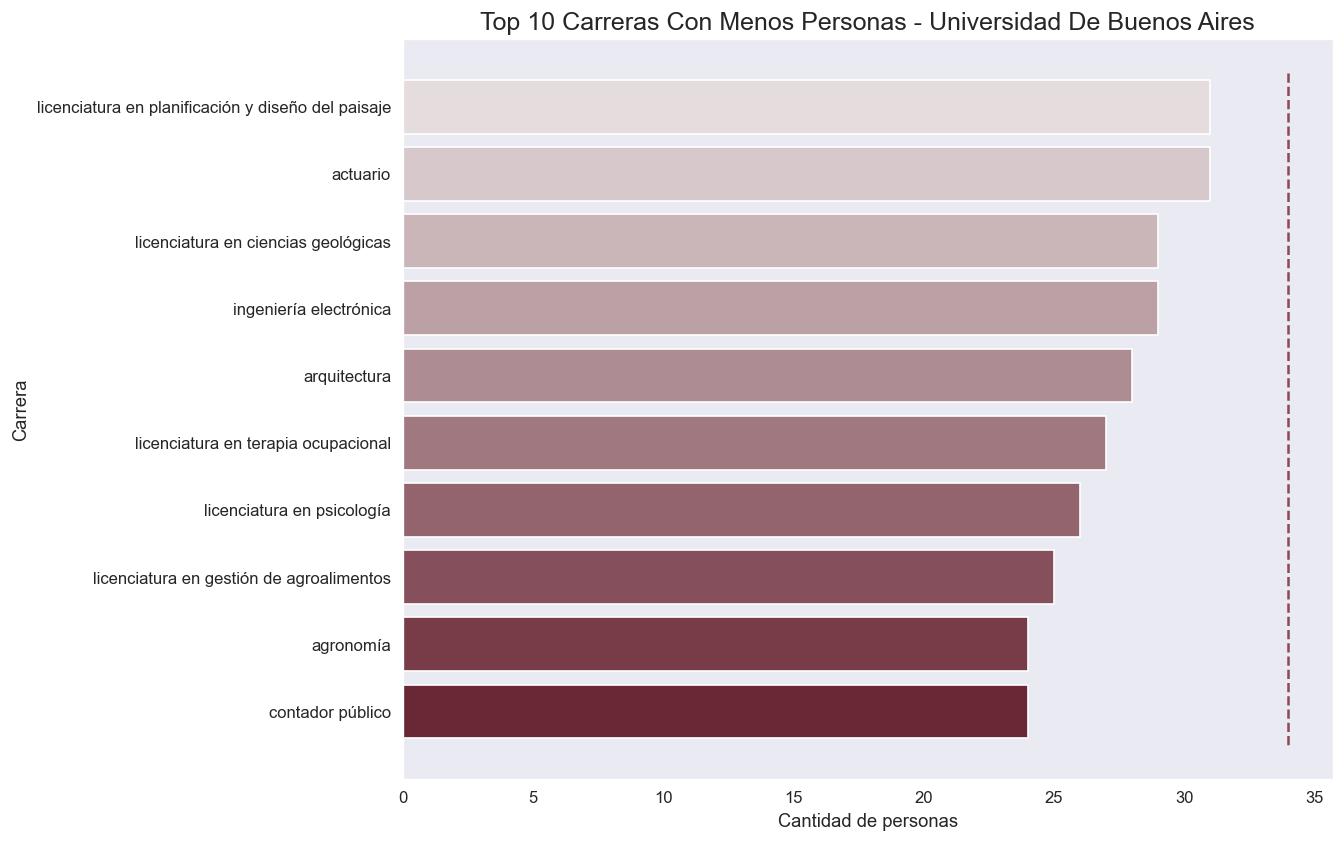

In [85]:
df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_1.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.tail(10), x='university', y='career', palette=colors_red[10::-1], ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_red[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con menos personas - {university1_name}'.title(),{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

plt.show()

Como se puede observar en este gráfico, estás 10 carreras son las que menor cantidad de alumnos presenta y que se encuentran alejados de la media de todas las carreras, vista como una línea punteada en el gráfico.

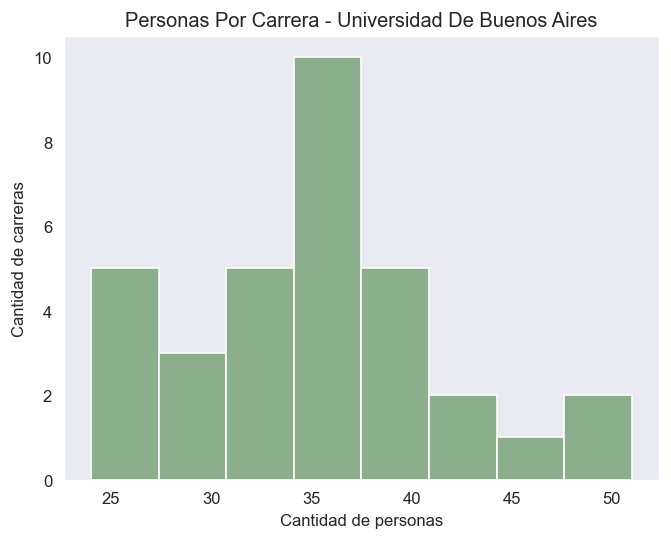

In [86]:
sns.histplot(df_1.career.value_counts(),bins=8, color=colors_green[5])
plt.title(f'Personas por carrera - {university1_name}'.title())
plt.xlabel('Cantidad de personas')
plt.ylabel('Cantidad de carreras')

plt.show()

In [87]:
#vemos los estadisticos de la distribucion de alumnos por carrera
df_1.career.value_counts().describe()

count    33.000000
mean     34.969697
std       6.578777
min      24.000000
25%      31.000000
50%      36.000000
75%      38.000000
max      51.000000
Name: career, dtype: float64

Como podémos observar la distribución de alumnos por carrera tiene una media de 34 alumnos, en este caso la mayoría de las carreras tienen al menos 31 alumnos.

### Universidad Nacional del Cine

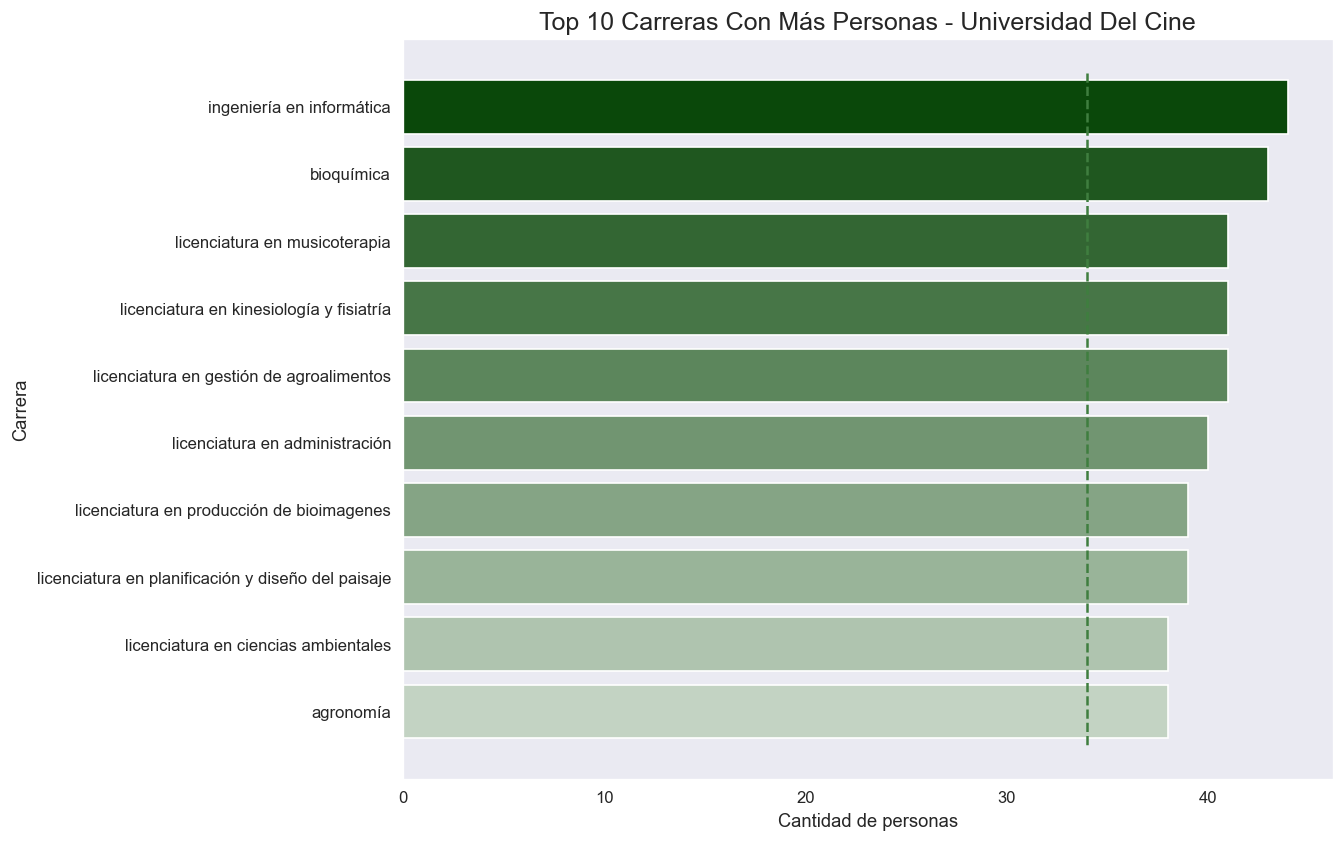

In [88]:
df_aux = df_2.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_2.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.head(10), x='university', y='career', palette=colors_green, ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_green[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con más personas - {university2_name}'.title(),{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

plt.show()

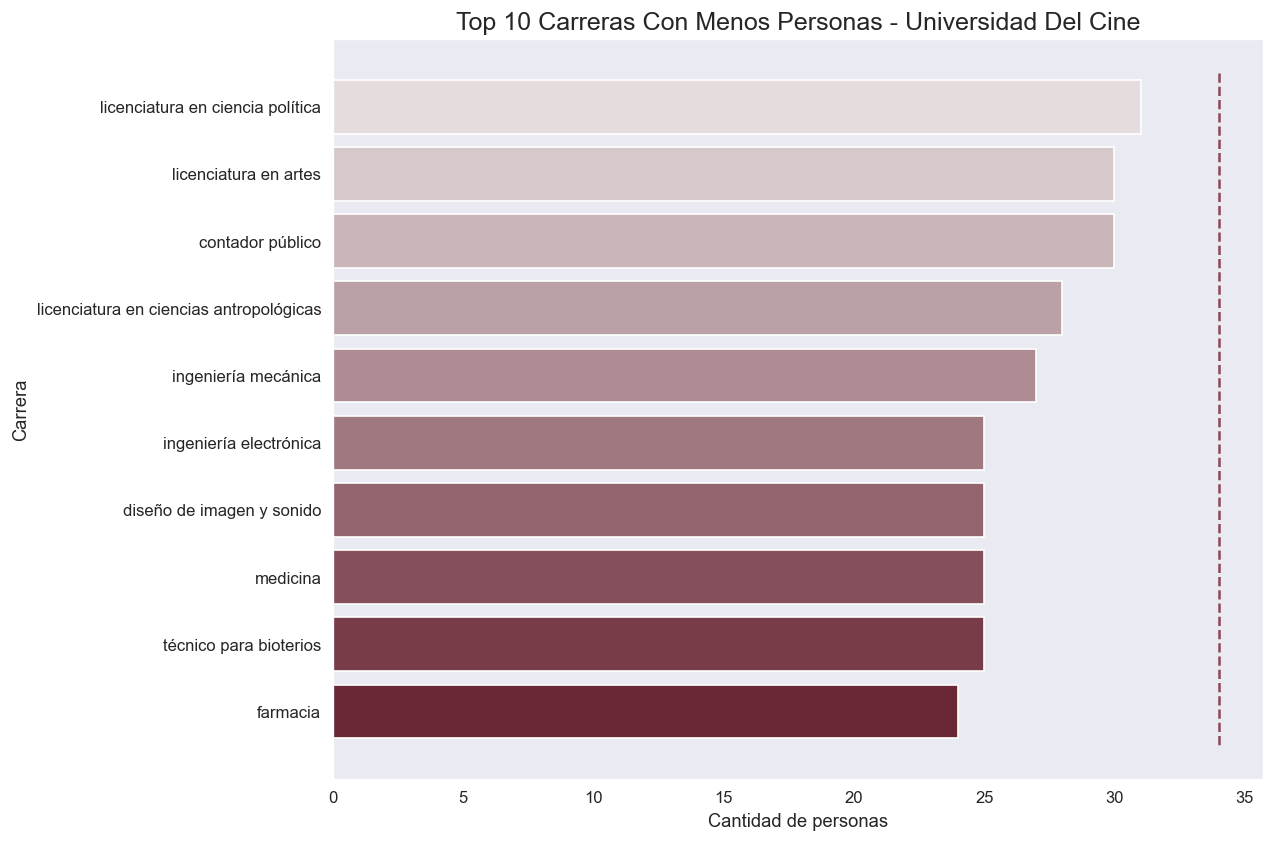

In [89]:
df_aux = df_2.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_2.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.tail(10), x='university', y='career', palette=colors_red[10::-1], ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_red[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con menos personas - {university2_name}'.title(),{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

plt.show()

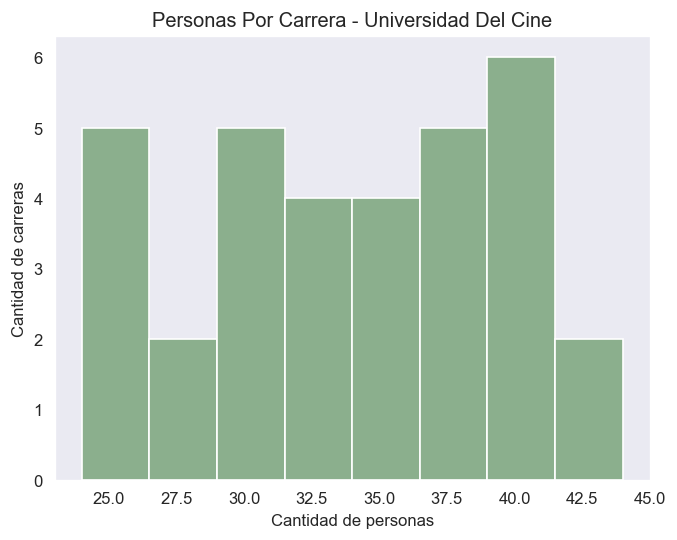

In [90]:
sns.histplot(df_2.career.value_counts(),bins=8, color=colors_green[5])
plt.title(f'Personas por carrera - {university2_name}'.title())
plt.xlabel('Cantidad de personas')
plt.ylabel('Cantidad de carreras')

plt.show()

In [91]:
#vemos los estadisticos de la distribucion de alumnos por carrera
df_2.career.value_counts().describe()

count    33.000000
mean     34.030303
std       5.795930
min      24.000000
25%      30.000000
50%      35.000000
75%      38.000000
max      44.000000
Name: career, dtype: float64

En este caso la media es de 34 alumnos por carrera, presentando un minímo de 24, pero la mayoría de las carreras tienen al menos 30 alumnos en esta universidad.

### Análisis por género y edad - Universidad Abierta Interamericana

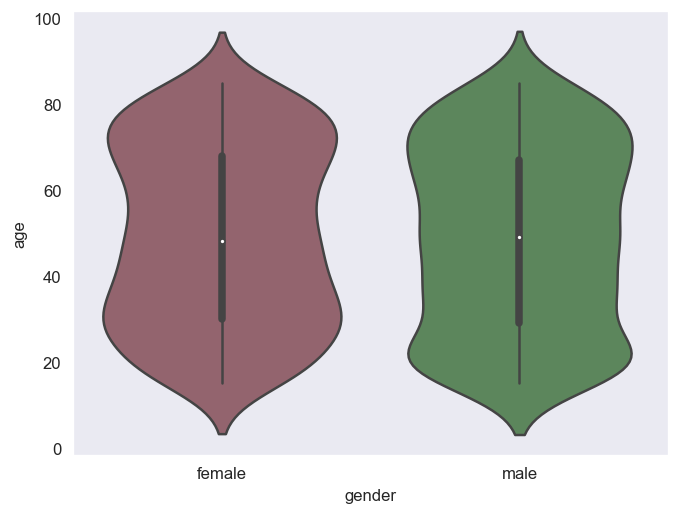

In [92]:
sns.violinplot(data=df_1,y='age', x='gender', palette=[colors_red[4], colors_green[4]])
plt.show()

Si observamos la distribución de la edad utilizando los diagrámas de violín categorízado por el género vemos que ambos poseen una distribución uniforme, con una alta dispersión, donde podemos observar una bimodalidad en ambos generos ubicada aproximadamente en los 30 años y los 80 años.

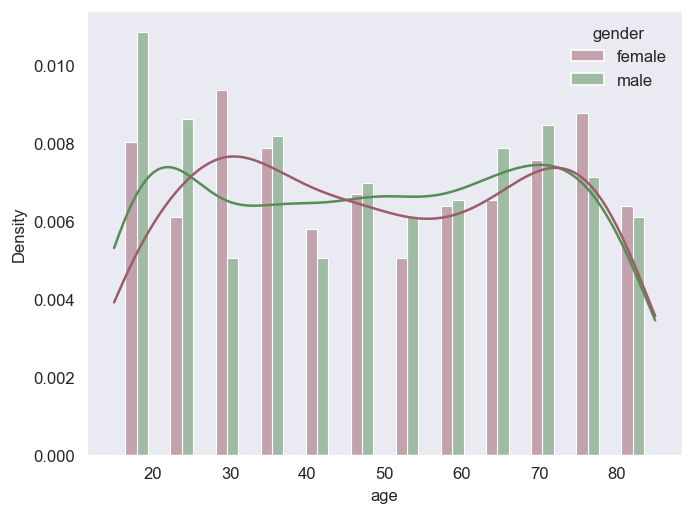

In [93]:
fig, ax = plt.subplots()
sns.histplot(data=df_1,
                x='age',
                hue='gender',
                kde=True,
                fill=True,
                multiple='dodge',
                shrink=.5,
                stat='density', 
                palette=[colors_red[4],
                colors_green[4]],
                ax=ax)
plt.show()
### top 10 localidades por alumnos

Otra forma de visualizar esto es a través de un gráfico de tipo histograma categorizado y sus respectivas curvas de densidad aproximada. En este caso podemos ver las dos modas en la distribución tanto de los varones como de las mujeres.

### Provincias - Universidad De Moron

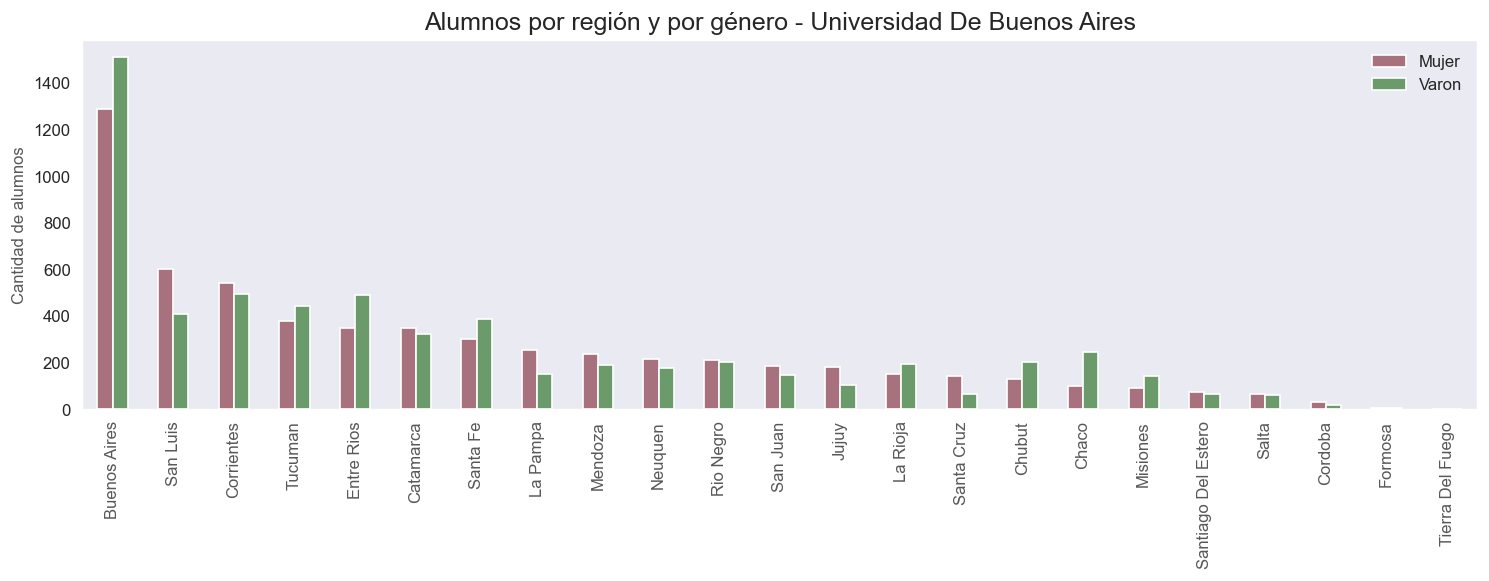

In [94]:
fig,ax=plt.subplots(figsize=(15,4))
df_aux = df_1geonames_merge.pivot_table(
    index=['region'],
    columns='gender',
    values=['first_name'],
    aggfunc={'region':'count'}
).sort_values(by=[('region','female')], ascending=False)

df_aux.plot(kind='bar',color=(colors_red[5],colors_green[5]),ax=ax)
ax.set_title(f'Alumnos por región y por género - {university1_name}',{'fontsize':15})
ax.set_ylabel('Cantidad de alumnos',{'color':colors_dark[3]})
ax.tick_params(axis='x', colors=colors_dark[3])
ax.set_xlabel('')
ax.legend(labels=['Mujer','Varon'])
plt.show()

En este gráfico de barras apareadas y ordenadas de forma descendente por género. Respecto a la distribución de alumnos por provincia podemos observar que la gran mayoría de los alumnos provienen de la Provincia de Buenos Aires y podemos destacar la diferencia entre géneros en cuanto a cantidad de alumnos.

Text(0.5, 0, '')

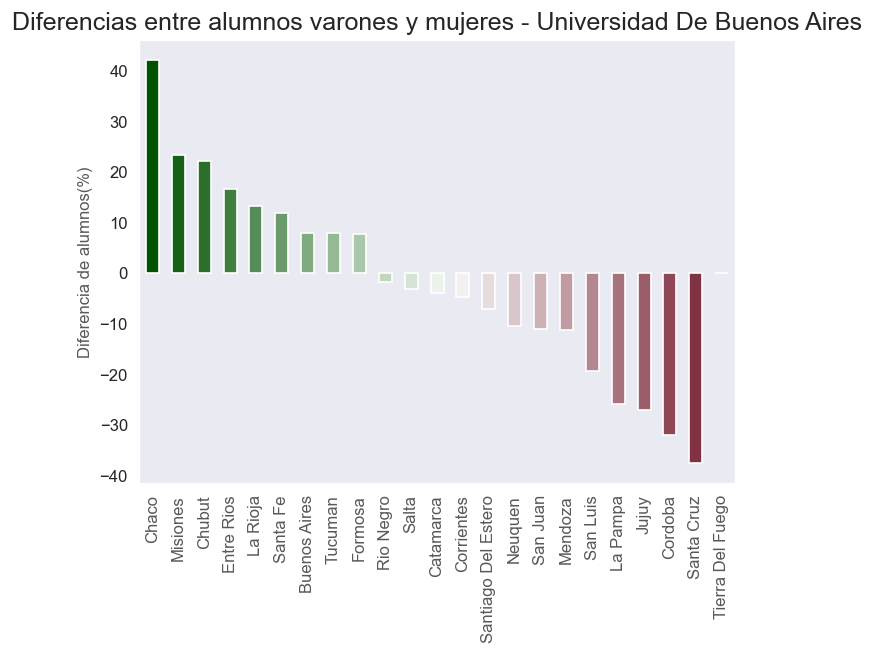

In [95]:
fig,ax = plt.subplots()

df_aux_2 = (df_aux.diff(axis=1)[(('region', 'male'))]) / df_aux.sum(axis=1) * 100

df_aux_2.sort_values(ascending=False).plot(kind='bar', x='region',ax=ax,color=colors_green+colors_red[::-1])

ax.set_title(f'Diferencias entre alumnos varones y mujeres - {university1_name}',{'fontsize':15})
ax.set_ylabel('Diferencia de alumnos(%)',{'color':colors_dark[3]})
ax.tick_params(axis='x', colors=colors_dark[3])
ax.set_xlabel('')

Con este gráfico podemos resumir como se ve la diferencia de alumnos para cada provincia en particular de forma porcentual. Chaco es la que presenta mayor disparidad respecto a varones junto con Misiones y Chubut. Respecto a disparidad de mujeres Santa Cruz, Cordoba y Jujuy son las que presentan mayor disparidad de alumnas provenientes de esas provincias.

### Localidades  - Universidad De Buenos Aires

In [96]:
df_1.location.value_counts().head(20)

9 de julio                7
buena vista               6
agua colorada             6
bella vista               6
baterias                  5
12 de octubre             5
algarrobo                 5
acasape                   4
el porvenir               4
arturo almaraz            4
albigasta                 4
aldea san antonio         4
chovet                    4
membrillar                4
ingenio la providencia    4
cañada seca               4
capilla del señor         4
algarrobo verde           4
balcosna                  4
arroyo del medio          3
Name: location, dtype: int64

<AxesSubplot: ylabel='Frequency'>

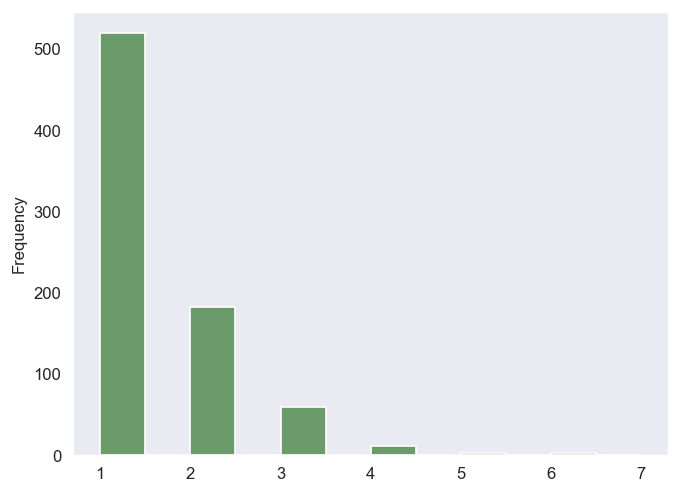

In [97]:
df_1.location.value_counts().plot(kind='hist', bins=12,color=colors_green[5])

Al parecer las localidades que destaca es **9 de Julio** la cual aporta 7 alumnos en comparación con las otras que llegan a veces a aportar solo 3 alumnos al total.

### Análisis por género y edad - Universidad Nacional de Rio Cuarto

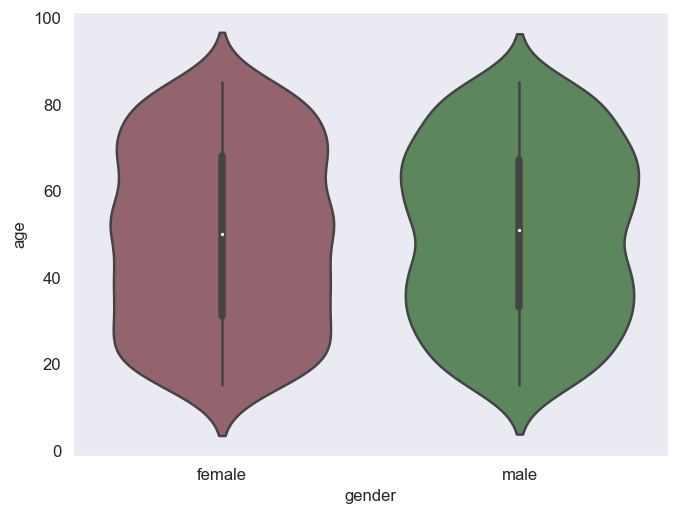

In [98]:
sns.violinplot(data=df_2,y='age', x='gender', palette=[colors_red[4], colors_green[4]])
plt.show()

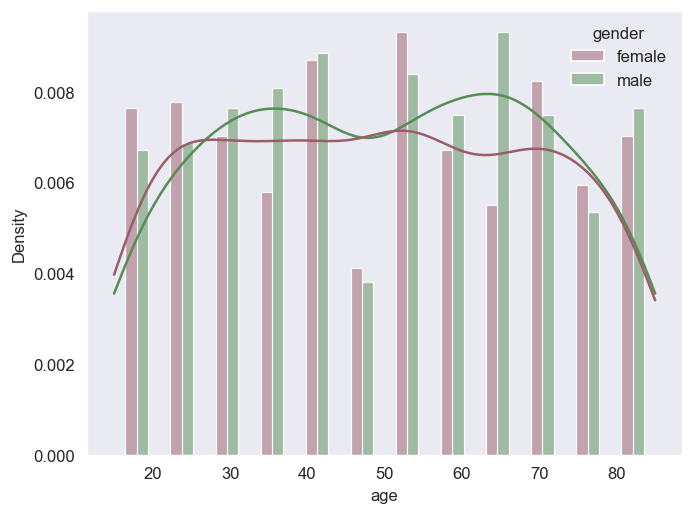

In [99]:
fig, ax = plt.subplots()
sns.histplot(data=df_2,
                x='age',
                hue='gender',
                kde=True,
                fill=True,
                multiple='dodge',
                shrink=.5,
                stat='density', 
                palette=[colors_red[4],
                colors_green[4]],
                ax=ax)
plt.show()
### top 10 localidades por alumnos

La distribución por edades parece ser dispersa entre todas las edades del espectro.

### Provincias - Universidad Nacional De Cine

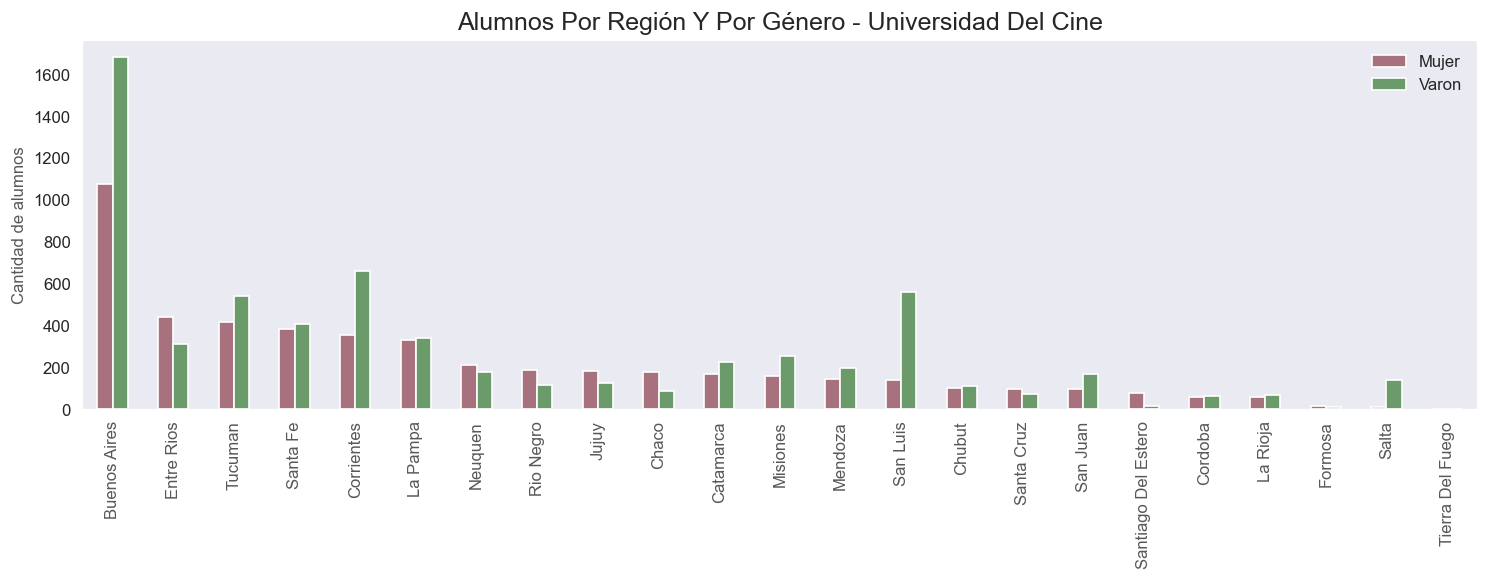

In [100]:
fig,ax=plt.subplots(figsize=(15,4))
df_aux = df_2geonames_merge.pivot_table(
    index=['region'],
    columns='gender',
    values=['first_name'],
    aggfunc={'region':'count'},
).sort_values(by=[('region','female')], ascending=False)

df_aux.plot(kind='bar',color=(colors_red[5],colors_green[5]),ax=ax)
ax.set_title(f'Alumnos por región y por género - {university2_name}'.title(),{'fontsize':15})
ax.set_ylabel('Cantidad de alumnos',{'color':colors_dark[3]})
ax.tick_params(axis='x', colors=colors_dark[3])
ax.set_xlabel('')
ax.legend(labels=['Mujer','Varon'])
plt.show()

Text(0.5, 0, '')

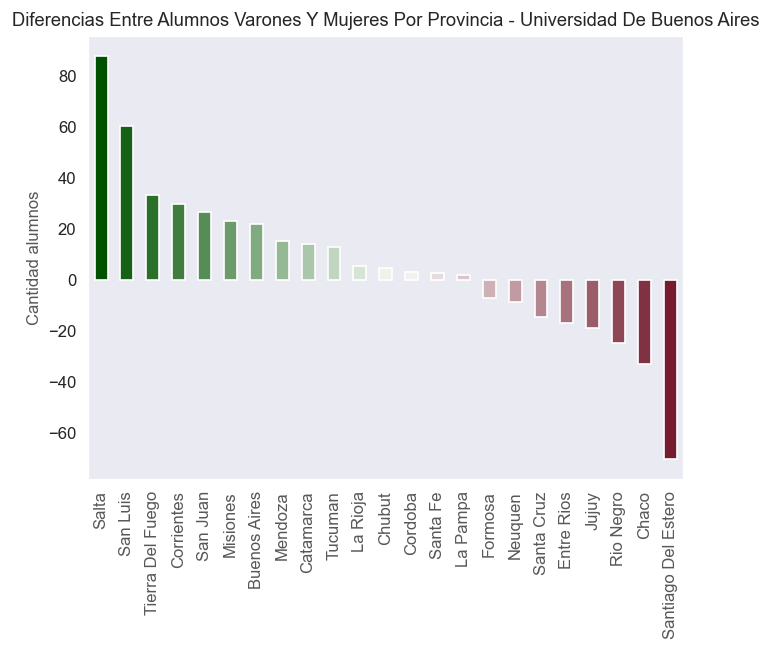

In [101]:
fig,ax = plt.subplots()

df_aux_2 = (df_aux.diff(axis=1)[(('region', 'male'))]) / df_aux.sum(axis=1) * 100

df_aux_2.sort_values(ascending=False).plot(kind='bar', x='region',ax=ax,color=colors_green+colors_red[::-1])

ax.set_title(f'Diferencias entre alumnos varones y mujeres por provincia - {university1_name}'.title(),{'fontsize':11})
ax.set_ylabel('Cantidad alumnos',{'color':colors_dark[3]})
ax.tick_params(axis='x', colors=colors_dark[3])
ax.set_xlabel('')

En esta universidad podemos ver un porcentaje mayor de hombres provenientes de provincias como Salta, San Luis y Tierra del Fuego mientras que la disparidad del lado femenino se produce de las personas provenientes de Santiago del Estero, Chaco y Rio Negro

### Localidades - Universidad De Cine

In [102]:
df_2.location.value_counts().head(10)

alto verde                  6
9 de julio                  5
barrio emir ramon juarez    5
algarrobo                   4
el talar                    4
d orbigny                   4
colonia abate               4
bouquet                     4
alto jaguel                 4
agua negra                  4
Name: location, dtype: int64

En este caso la mayor cantidad de personas que estudian en la universidad son provenientes de Alto Verde, seguido por 9 de julio y el barrio Emir Ramon Juarez

<AxesSubplot: ylabel='Frequency'>

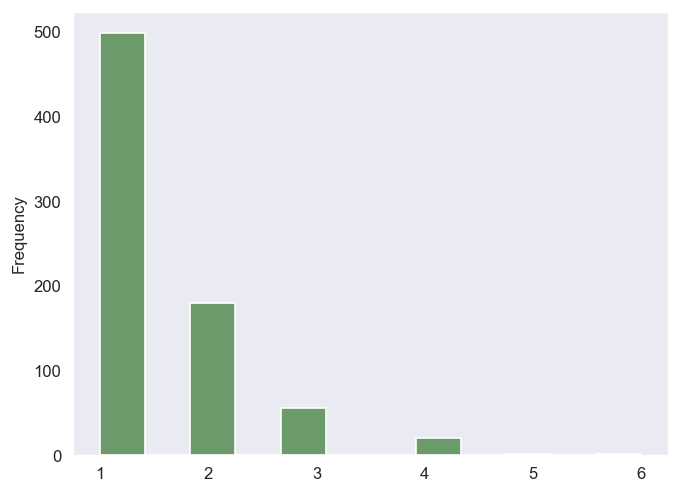

In [103]:
df_2.location.value_counts().plot(kind='hist', bins=12,color=colors_green[5])

### Segregación por tipo de carrera

In [104]:
def clasificador(x):
    
    clasificador ={
    'exactas_nat':['agronomía','licenciatura en ciencias biológicas','licenciatura en ciencias ambientales','licenciatura en ciencias biológicas', 'licenciatura en ciencias geológicas', 
    'técnico para bioterios', 'ingeniería electrónica', 'ingeniería en informática','ingeniería mecánica','licenciatura en ciencias de la computación'],
    'ciencias_salud':['ciencias veterinarias','farmacia','licenciatura en kinesiología y fisiatría','licenciatura en producción de bioimagenes','medicina','licenciatura en gestión de agroalimentos', 'licenciatura en ciencia y tecnología de alimentos','bioquímica'],
    'diseño_art':['diseño industrial', 'diseño de imagen y sonido', 'licenciatura en artes', 'licenciatura en musicoterapia', ],
    'empresarial':['actuario', 'contador público','licenciatura en administración'],
    'sociales':['licenciatura en ciencias antropológicas','licenciatura en ciencias de la educación','licenciatura en psicología', 'licenciatura en relaciones del trabajo','licenciatura en sociología','licenciatura en terapia ocupacional']
}
    if x in clasificador['exactas_nat']:
        return "Exactas y Naturales"
    elif x in clasificador['diseño_art']:
        return "Artes y Diseño"
    elif x in clasificador['empresarial']:
        return "Ciencias Empresariales"
    elif x in clasificador['ciencias_salud']:
        return "Salud"
    else:
        return "Sociales"
df_1['tipo_career'] = df_1.career.apply(clasificador)
df_2['tipo_career'] = df_2.career.apply(clasificador)

### Proporción de alumnos por tipo de carrera y género

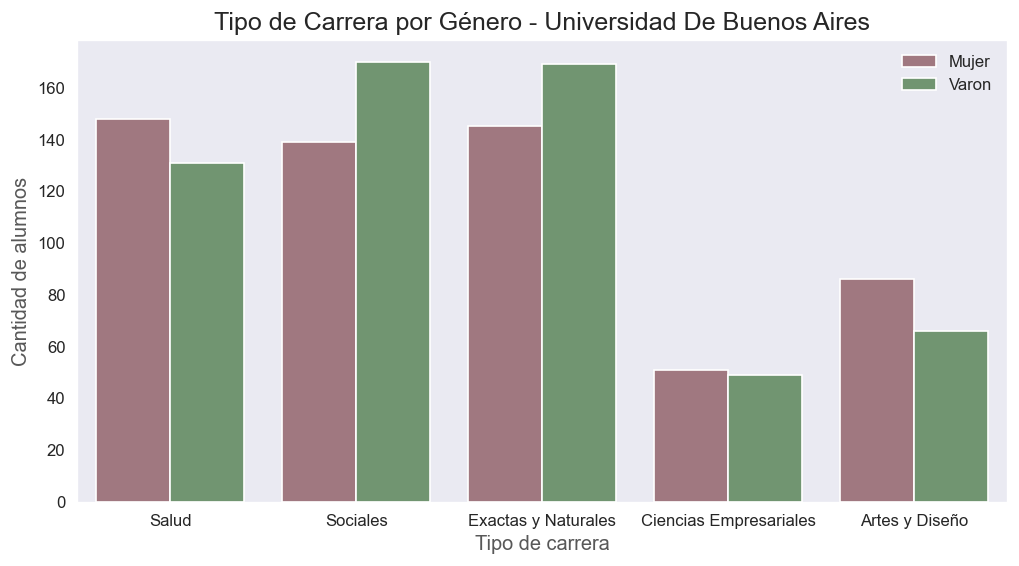

In [105]:
fig,ax = plt.subplots(figsize=(10,5))
g = sns.countplot(data=df_1,
                    x='tipo_career',
                    hue='gender',
                    palette=[colors_red[5],
                    colors_green[5]],
                    ax=ax)

g.set_title(f'Tipo de Carrera por Género - {university1_name}',{'fontsize':15})
g.set_ylabel('Cantidad de alumnos',{'fontsize':12,'color':colors_dark[3]})
g.set_xlabel('Tipo de carrera',{'fontsize':12,'color':colors_dark[3]})
g.set_xticklabels(labels=g.get_xticklabels())
ax.legend(labels=['Mujer','Varon'])


En la Universidad de Buenos Aires parece haber cierta disparidad de varones frente a mujeres en Sociales, exactas y naturales. Las mujeres predominan en carreras de salud, ciencias empresariales y artes y diseño.

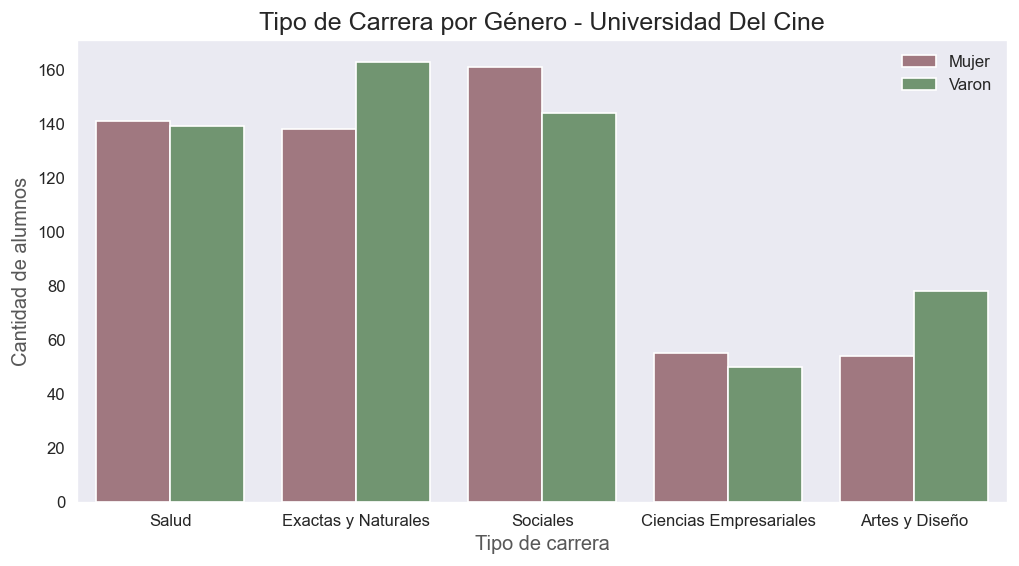

In [106]:
fig,ax = plt.subplots(figsize=(10,5))
g = sns.countplot(data=df_2,
                    x='tipo_career',
                    hue='gender',
                    palette=[colors_red[5],
                    colors_green[5]],
                    ax=ax)

g.set_title(f'Tipo de Carrera por Género - {university2_name}',{'fontsize':15})
g.set_ylabel('Cantidad de alumnos',{'fontsize':12,'color':colors_dark[3]})
g.set_xlabel('Tipo de carrera',{'fontsize':12,'color':colors_dark[3]})
g.set_xticklabels(labels=g.get_xticklabels())
ax.legend(labels=['Mujer','Varon'])

En cuanto a la universidad del cine si bien la disparidad no es muy alta, los hombres predominan en carreras de exactas, naturales, artes y diseño; mientras que las mujeres predominan en carreras del tipo sociales o ciencias empresariales.

### Top Carreras por Proporción de Alumnas - Universidad De Buenos Aires

**Carreras con mayor proporción de mujeres**

In [107]:
top_carreer_f = (df_1.groupby(['gender','career']).size() / df_1.groupby('career').size()).unstack().T.sort_values(by='female',ascending=False)
top_carreer_f.head()

gender,female,male
career,,
licenciatura en terapia ocupacional,0.629630,0.370370
licenciatura en artes,0.628571,0.371429
medicina,0.625000,0.375000
diseño de imagen y sonido,0.605263,0.394737
bioquímica,0.594595,0.405405


**Carreras con menor proporción de mujeres**

In [108]:
top_carreer_f = (df_1.groupby(['gender','career']).size() / df_1.groupby('career').size()).unstack().T.sort_values(by='female',ascending=False)
top_carreer_f.tail()

gender,female,male
career,,
licenciatura en ciencias biológicas,0.388889,0.611111
licenciatura en relaciones del trabajo,0.387755,0.612245
licenciatura en planificación y diseño del paisaje,0.387097,0.612903
contador público,0.375000,0.625000
arquitectura,0.321429,0.678571


### Top Carreras por Proporción de Alumnas - Universidad Del Cine

**Carreras con mayor proporción de mujeres**

In [109]:
top_carreer_f_2 = (df_2.groupby(['gender','career']).size() / df_2.groupby('career').size()).unstack().T.sort_values(by='female',ascending=False)
top_carreer_f_2.head()

gender,female,male
career,,
licenciatura en terapia ocupacional,0.710526,0.289474
licenciatura en ciencias antropológicas,0.642857,0.357143
medicina,0.640000,0.360000
licenciatura en kinesiología y fisiatría,0.585366,0.414634
farmacia,0.583333,0.416667


**Carreras con menos proporción de mujeres**

In [110]:
top_carreer_f_2 = (df_2.groupby(['gender','career']).size() / df_2.groupby('career').size()).unstack().T.sort_values(by='female',ascending=False)
top_carreer_f_2.tail()

gender,female,male
career,,
licenciatura en ciencia y tecnología de alimentos,0.387097,0.612903
licenciatura en musicoterapia,0.365854,0.634146
técnico para bioterios,0.360000,0.640000
ingeniería electrónica,0.360000,0.640000
licenciatura en artes,0.333333,0.666667


### Algunos ejemplos

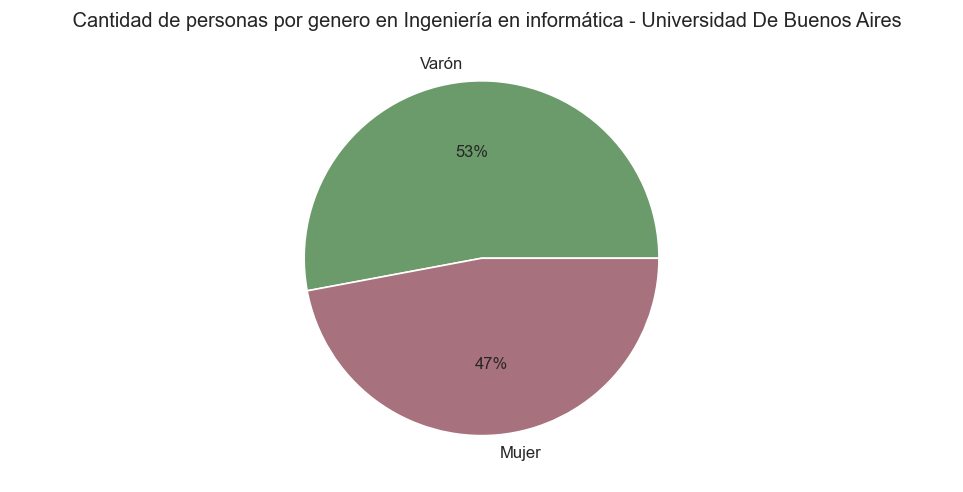

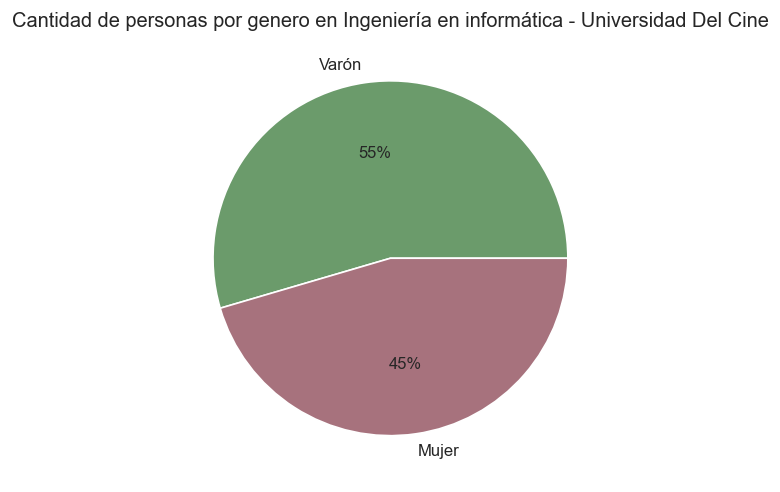

In [111]:
career = 'ingeniería en informática'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['Varón', 'Mujer']
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'           Cantidad de personas por genero en {career.capitalize()} - {university1_name}         ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()


La carrera de informática suele tener el prejuicio de ser una carrera propia de varones, sin embargo, en estos dos casos podemos ver que hay una gran paridad entre la cantidad de hombres y de mujeres que la cursan.

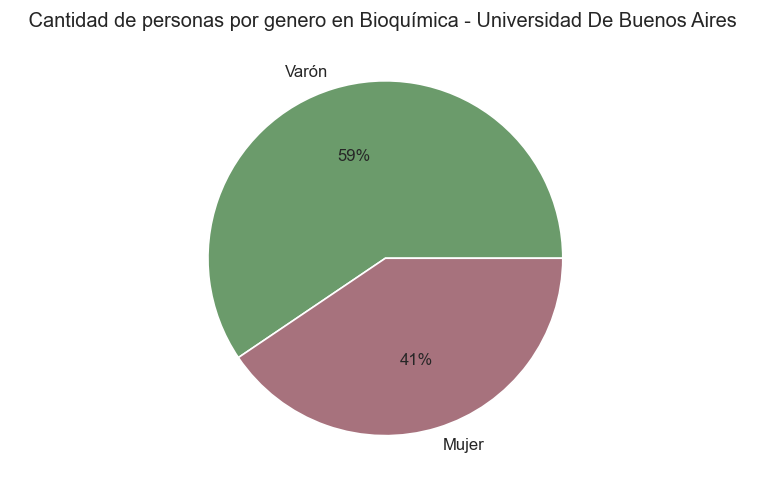

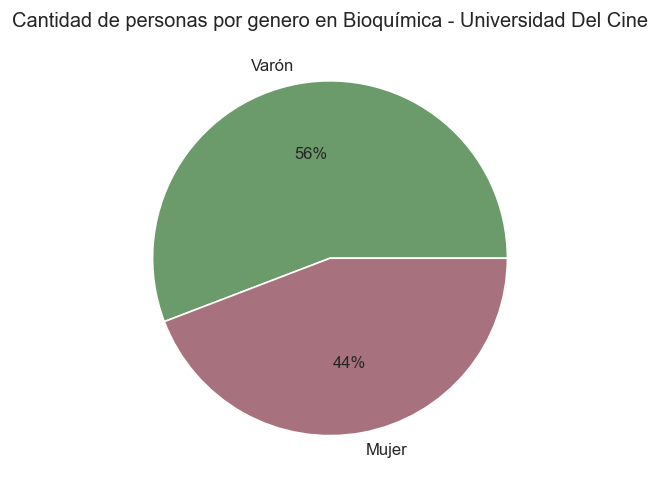

In [112]:
career = 'bioquímica'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['Varón', 'Mujer']
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()

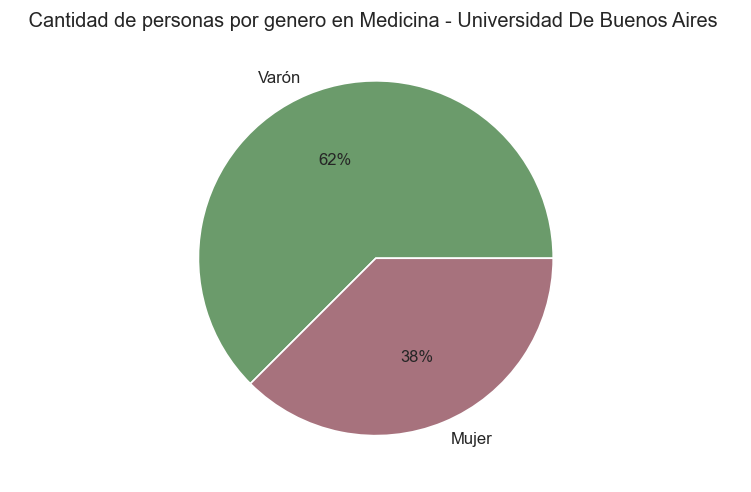

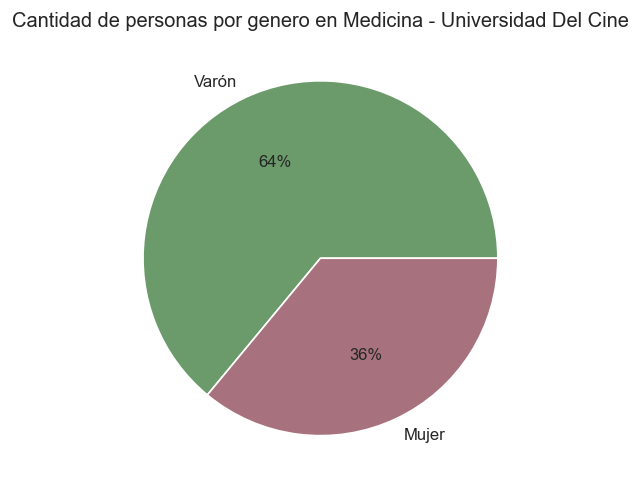

In [113]:
career = 'medicina'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['Varón', 'Mujer']
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()

Tanto en Bioquímica como en Medicina, dos carreras que suelen tener el prejuicio de tener más mujeres en ambas carreras para ambas universidades muestran o una prevalencia de varones frente a mujeres.

# Conclusiones

- Tanto la Universidad De Buenos Aires como la Universidad del Cine tienen una distribución uniforme, con lo cuál es importante remarcar que la cantidad de alumnos de todas las edades en edad de trabajo es alta y podría ser interesante la estimulación de turnos y comisiones nocturnas para no interferir con sus actividades.

- Tanto la Universidad De Buenos Aires como la Universidad del Cine tienen una paridad interesante en cuanto a la cantidad de alumnos según su genero.

- Podemos observar que en algunas carreras popularmente consideradas de mayor cantidad de alumnos hombres como lo son computación o mecanica podemos encontrar un porcentaje muy alto de alumnas.